In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
features_1 = pd.read_csv('Combined_Provider.csv')
features_1 = features_1.drop('PotentialFraud', axis = 1)
features_2 = pd.read_csv('new_features.csv')

In [130]:
all_features_all = features_1.merge(features_2, on = 'Provider')

In [4]:
pd.set_option('display.max_columns', 100) # shows all the columns

In [5]:
all_features.sample(10)

,CDC_2449,CDC_25000,CDC_2720,CDC_2724,CDC_4011,CDC_4019,CDC_41401,CDC_42731,CDC_4280,CDC_496,CDC_53081,CDC_5990,CDC_V5861,CDC_V5869,CPC_2724,CPC_3722,CPC_3893,CPC_3995,CPC_4019,CPC_4516,CPC_66,CPC_8151,CPC_8154,CPC_9904,DGC_166,DGC_167,DGC_183,DGC_186,DGC_187,DGC_188,DGC_192,DGC_202,DGC_208,DGC_881,DGC_882,DGC_883,DGC_884,DGC_887,DGC_939,DGC_940,DGC_941,DGC_945,Provider,Claim,Patient_Count,Male_Patient,Female_Patient,Age(26-40),Age(41-60),Age(61-80),Age(81-100),Race_White,Race_Black,Race_Hispanic,Race_Native,Hos_Stay_Total,Hos_Stay_Avg,Payment_Total,Payment_Avg,Claim_Len_Total,Claim_Len_Avg,Alzheimer,Heartfailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,rheumatoidarthritis,stroke,RenalDisease,State_Count,County_Count,DiagnosisGroupCode,DiagGroupCode,PotentialFraud
4140,0,1,1.0,2,1.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51134,15,12,8.0,4.0,0.0,2.0,9.0,1.0,10.0,0.0,2.0,0.0,0.0,0,7690.0,513.0,40,3.0,10,9,7,1,5,8,10,9,2,4,0,4,1,3,0.0,0.0,No
1690,1,0,0.0,2,0.0,3,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,PRV56057,9,9,4.0,5.0,0.0,0.0,6.0,3.0,7.0,1.0,1.0,0.0,56.0,6,106612.0,11846.0,56,6.0,4,5,4,2,3,4,8,7,6,5,0,1,1,2,9.0,9.0,No
5169,0,0,0.0,1,1.0,0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51645,5,5,3.0,2.0,0.0,0.0,5.0,0.0,3.0,1.0,0.0,1.0,0.0,0,370.0,74.0,27,5.0,2,3,2,2,2,1,4,4,1,2,1,0,1,3,0.0,0.0,No
1718,3,1,1.0,1,1.0,4,0.0,3,1,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,PRV56470,37,26,7.0,19.0,0.0,4.0,16.0,6.0,22.0,4.0,0.0,0.0,23.0,1,41080.0,1110.0,47,1.0,19,24,7,7,14,18,19,27,9,9,2,6,1,5,5.0,5.0,No
1457,1,2,2.0,3,2.0,4,0.0,2,3,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV56889,50,29,14.0,15.0,1.0,4.0,21.0,3.0,21.0,5.0,1.0,2.0,46.0,1,132340.0,2647.0,54,1.0,21,36,22,10,12,22,40,39,22,11,1,2,2,8,5.0,5.0,No
4871,0,0,0.0,0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51205,10,10,5.0,5.0,0.0,1.0,5.0,4.0,9.0,1.0,0.0,0.0,0.0,0,4730.0,473.0,20,2.0,3,4,5,3,4,3,6,6,5,4,0,2,2,5,0.0,0.0,No
727,1,4,2.0,4,2.0,8,0.0,4,3,0.0,0.0,0.0,1.0,1.0,0,1,1,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV52902,46,44,19.0,25.0,2.0,2.0,26.0,14.0,39.0,3.0,2.0,0.0,58.0,1,153770.0,3343.0,76,2.0,19,32,21,6,14,21,32,37,15,11,5,8,2,14,21.0,21.0,No
1112,6,6,6.0,5,4.0,7,0.0,3,4,0.0,0.0,0.0,3.0,4.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV55185,206,70,33.0,37.0,3.0,10.0,39.0,18.0,55.0,12.0,2.0,1.0,11.0,0,118010.0,573.0,163,1.0,65,155,82,28,53,127,167,172,51,61,17,22,2,9,5.0,5.0,No
2497,3,2,4.0,6,5.0,5,0.0,4,5,0.0,0.0,0.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51699,209,131,50.0,81.0,2.0,15.0,82.0,32.0,93.0,7.0,23.0,8.0,0.0,0,54780.0,262.0,262,1.0,75,115,67,33,63,93,139,166,48,53,7,26,1,1,0.0,0.0,No
3665,1,5,0.0,5,4.0,7,0.0,3,1,0.0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV53490,145,66,32.0,34.0,3.0,7.0,41.0,15.0,46.0,20.0,0.0,0.0,0.0,0,39060.0,269.0,171,1.0,90,99,73,12,57,72,101,122,49,53,27,35,2,7,0.0,0.0,No


In [6]:
all_features = all_features.drop(['Patient_Count','DiagGroupCode','Claim', 'Hos_Stay_Avg','Claim_Len_Avg','Payment_Avg'],axis=1 )

In [7]:
all_features = all_features.drop(['RenalDisease', 'DGC_945', 'CPC_8151', 'DGC_939', 'DGC_187', 'DGC_167',
       'DGC_940', 'Cancer', 'CPC_4516', 'DGC_883', 'Race_Black', 'CPC_3722',
       'Race_White', 'Age(26-40)', 'Race_Hispanic', 'Race_Native', 'CPC_3893',
       'rheumatoidarthritis', 'State_Count', 'Depression', 'CPC_8154',
       'Age(81-100)', 'CPC_9904', 'DGC_166', 'DGC_183', 'DGC_186', 'DGC_188',
       'DGC_192', 'DGC_202', 'DGC_208', 'DGC_881', 'Age(61-80)', 'DGC_884',
       'DGC_887', 'DGC_941', 'Age(41-60)', 'DGC_882'],axis=1)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)

In [ ]:
all_fraud = all_features[all_features['PotentialFraud']=='Yes'].set_index('Provider').drop('PotentialFraud',axis=1)

In [ ]:
all_Nfraud = all_features[all_features['PotentialFraud']=='No'].set_index('Provider').drop('PotentialFraud',axis=1)

In [ ]:
all_fraud_MBA = all_fraud.astype(bool)

In [ ]:
all_fraud_MBA_1 = [s for s in all_fraud_MBA.columns if s.find("CDC_")>=0]

In [ ]:
Chronic_Conditions = ['Alzheimer',
 'Heartfailure',
 'KidneyDisease',
 'Cancer',
 'ObstrPulmonary',
 'Depression',
 'Diabetes',
 'IschemicHeart',
 'Osteoporasis',
 'rheumatoidarthritis',
 'stroke',
 'RenalDisease']

In [ ]:
all_fraud_MBA_CDC_CC = all_fraud_MBA[(all_fraud_MBA_1) + (Chronic_Conditions)]

In [ ]:
all_fraud_MBA_CDC_CC.shape

In [ ]:
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# frequent_itemsets = apriori(all_fraud_MBA_CDC_CC, min_support=0.8, use_colnames=True)
# association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

In [ ]:
# MBA_F_CDC = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [119]:
rf    = RandomForestClassifier(class_weight='balanced')
params = {'n_estimators':range(20,81,10), 'max_depth':range(2,12), 'max_features':range(1,5), \
          'min_samples_leaf':range(1,5), 'min_samples_split':range(2,5)}
gs_rf = GridSearchCV(rf, params, cv=3, iid=True, return_train_score=True)

In [10]:
all_features = all_features.set_index('Provider')

In [138]:
X = Found_Fraud.drop('PotentialFraud',axis=1)
y = Found_Fraud['PotentialFraud']
y = y.replace('Yes',1).replace('No',0)

In [142]:
np.random.seed(0)
select = X.columns
gs_rf.fit(X[select], y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [144]:
gs_rf.best_score_

0.9992606284658041

In [145]:
gs_rf.best_params_

{'max_depth': 3,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [146]:
Best_param = gs_rf.best_params_

In [147]:
gs_rf.best_estimator_.score(X,y)

0.9987060998151571

In [140]:
rf_c = RandomForestClassifier(class_weight='balanced', max_depth = 3,max_features = 1, min_samples_leaf =1,min_samples_split = 2, n_estimators = 20, random_state = 42)
rf_c.fit(X_train,y_train)
y_pred = rf_c.predict(X_test)

In [148]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[967   0]
 [  3 112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       967
           1       1.00      0.97      0.99       115

    accuracy                           1.00      1082
   macro avg       1.00      0.99      0.99      1082
weighted avg       1.00      1.00      1.00      1082

0.9972273567467652


In [149]:
importances = pd.Series(gs_rf.best_estimator_.feature_importances_, index=select).sort_values(ascending=False)
importances.reset_index()

,index,0
0,CDC_496,0.295541
1,CDC_5990,0.251811
2,CDC_53081,0.194193
3,CDC_41401,0.170603
4,CDC_2724,0.087851


In [ ]:
feature_reduction = importances.tail(37)
feature_importances = importances.head(30)

In [ ]:
feature_reduction

In [ ]:
from sklearn import svm
from sklearn import metrics

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

In [13]:
from sklearn.cluster import KMeans

In [16]:
all_features1 = all_features.replace('Yes',1).replace('No',0)

In [78]:
all_features_F = all_features1[all_features1['PotentialFraud']==1]
all_features_NF = all_features1[all_features1['PotentialFraud']==0]

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_features_F)

In [43]:
kmeans = KMeans(n_clusters=2, init='k-means++')

In [44]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
kmeans.inertia_

9373.050381614255

Text(0, 0.5, 'Inertia')

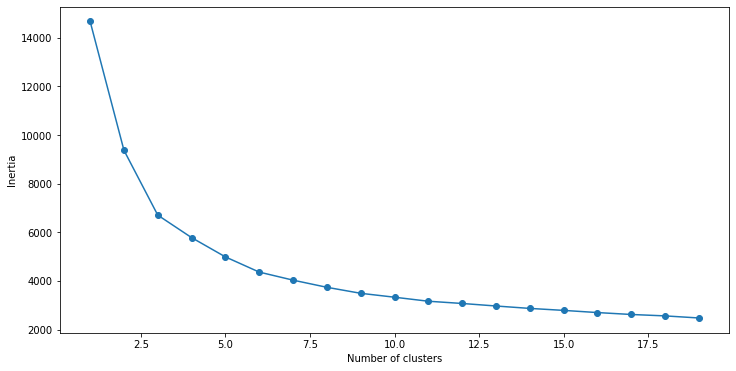

In [46]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [47]:
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [48]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    169
3    141
5    122
2     40
1     28
4      6
Name: cluster, dtype: int64

In [143]:
frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,cluster
0,4.073980,2.629640,2.603589,2.760566,1.670712,1.888622,0.0,3.051879,2.915170,0.0,0.0,0.0,1.714926,1.309402,3.437766,4.192345,5.383546,3.996105,1.841744,1.911872,6.175312,5.437467,2.719439,1.768728,1.558723,1.576640,1.718129,1.526869,1.395358,1.510153,2.214676,2.341417,5.466046,0.0,2
1,1.030936,-0.549899,-0.798943,0.414731,-0.876322,0.308851,0.0,1.948324,0.483051,0.0,0.0,0.0,-0.176661,-0.848114,-0.255291,-0.238530,2.524758,-0.250244,-0.365706,-0.408202,0.995281,0.714805,-0.208876,-0.233668,-0.362211,-0.317074,-0.320427,-0.370002,-0.362806,-0.302320,-0.306483,-0.283338,1.218513,0.0,4
2,1.639545,1.266981,0.335234,0.883898,1.670712,1.888622,0.0,0.844769,2.307140,0.0,0.0,0.0,2.345455,0.770023,3.437766,4.192345,-0.334031,-0.250244,0.207657,0.308912,1.297764,1.397512,0.792130,0.247677,0.273685,0.275907,0.031916,0.214499,0.089587,0.040580,0.151910,0.531241,2.136899,0.0,2
3,0.422328,0.812761,-0.231854,-0.054436,-0.876322,0.703794,0.0,0.844769,0.483051,0.0,0.0,0.0,-0.176661,-0.848114,-0.255291,4.192345,2.524758,-0.250244,-0.251034,-0.323836,1.562437,0.744899,0.010250,-0.349191,-0.282724,-0.259689,-0.093921,-0.314860,-0.301116,-0.351306,-0.382882,-0.102321,1.333312,0.0,4
4,2.248154,2.175420,1.469412,1.353065,1.033953,1.493679,0.0,1.396546,2.307140,0.0,0.0,0.0,2.345455,1.309402,-0.255291,4.192345,2.524758,3.996105,0.895694,0.899476,2.847992,2.679901,1.559069,0.825291,0.816845,1.347099,0.585598,1.019566,0.942965,0.677395,0.686701,0.712258,3.170082,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,-0.794890,-1.004118,-0.798943,-0.992771,-0.876322,-1.270920,0.0,-0.810564,-0.733008,0.0,0.0,0.0,-0.807190,-0.848114,-0.255291,-0.238530,-0.334031,-0.250244,-0.566384,-0.598026,-0.365895,-0.482223,-0.567445,-0.522476,-0.547680,-0.527487,-0.546933,-0.535427,-0.537594,-0.547249,-0.535679,-0.645373,-0.388661,0.0,1
4900,-0.794890,-1.004118,-0.798943,-0.992771,-0.876322,-1.270920,0.0,-0.810564,-0.733008,0.0,0.0,0.0,-0.807190,-0.848114,-0.255291,-0.238530,-0.334031,-0.250244,-0.566384,-0.598026,-0.365895,-0.494791,-0.567445,-0.541729,-0.547680,-0.527487,-0.521766,-0.535427,-0.537594,-0.547249,-0.535679,-0.645373,-0.388661,0.0,1
4901,-0.794890,-1.004118,-0.798943,-0.992771,-0.876322,-1.270920,0.0,-0.810564,-0.733008,0.0,0.0,0.0,-0.807190,-0.848114,-0.255291,-0.238530,-0.334031,-0.250244,-0.595052,-0.576935,-0.365895,-0.492996,-0.467843,-0.522476,-0.534432,-0.527487,-0.521766,-0.535427,-0.537594,-0.547249,-0.535679,-0.645373,-0.388661,0.0,1
4902,-0.794890,-1.004118,-0.798943,-0.992771,-0.876322,-1.270920,0.0,-0.810564,-0.733008,0.0,0.0,0.0,-0.807190,-0.848114,-0.255291,-0.238530,-0.334031,-0.250244,-0.595052,-0.576935,-0.365895,-0.511759,-0.567445,-0.541729,-0.534432,-0.527487,-0.521766,-0.535427,-0.537594,-0.522756,-0.535679,-0.645373,-0.388661,0.0,1


## Fraud Cluster

In [57]:
frame_F = frame[frame['cluster']==5].reset_index().rename(columns={'index':'Provider'})

In [60]:
frame_list = frame_F.Provider.to_list()

In [64]:
all_features_F1 = all_features_F.reset_index()

In [67]:
all_features_F1 = all_features_F1.reset_index()

In [70]:
Fraud_Cluster_5 = all_features_F1[all_features_F1['index'].isin(frame_list)]

In [76]:
Fraud_Cluster_5

,index,Provider,CDC_2449,CDC_25000,CDC_2720,CDC_2724,CDC_4011,CDC_4019,CDC_41401,CDC_42731,CDC_4280,CDC_496,CDC_53081,CDC_5990,CDC_V5861,CDC_V5869,CPC_2724,CPC_3995,CPC_4019,CPC_66,Male_Patient,Female_Patient,Hos_Stay_Total,Payment_Total,Claim_Len_Total,Alzheimer,Heartfailure,KidneyDisease,ObstrPulmonary,Diabetes,IschemicHeart,Osteoporasis,stroke,County_Count,DiagnosisGroupCode,PotentialFraud
13,13,PRV53937,1,2,0.0,1,0.0,4,4.0,1,3,3.0,2.0,4.0,0.0,0.0,0,0,1,0,20.0,18.0,117.0,236166.0,157,16,26,21,17,31,31,14,5,12,17.0,1
25,25,PRV55670,0,2,0.0,1,0.0,2,1.0,3,1,2.0,3.0,1.0,0.0,0.0,0,1,0,1,2.0,6.0,51.0,107612.0,51,6,7,5,5,7,8,6,1,2,9.0,1
35,35,PRV54875,2,1,0.0,2,0.0,3,3.0,3,2,0.0,2.0,4.0,0.0,0.0,0,1,0,0,8.0,11.0,183.0,192292.0,183,7,12,10,7,14,19,3,6,8,20.0,1
64,64,PRV51173,1,1,0.0,1,0.0,3,0.0,2,0,2.0,1.0,1.0,0.0,0.0,1,0,0,0,12.0,9.0,55.0,103966.0,95,6,10,8,6,18,11,3,3,10,7.0,1
81,81,PRV53277,3,3,0.0,5,0.0,5,2.0,5,3,1.0,1.0,3.0,0.0,0.0,0,1,1,1,15.0,19.0,108.0,145130.0,147,20,31,16,8,32,38,12,2,6,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,PRV57282,0,2,0.0,2,0.0,4,0.0,1,0,2.0,1.0,0.0,0.0,0.0,0,0,0,0,15.0,10.0,0.0,8350.0,22,10,31,26,18,27,29,5,1,2,0.0,1
502,502,PRV54540,1,1,0.0,0,0.0,3,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,6.0,13.0,0.0,9790.0,0,6,12,6,5,11,13,8,1,5,0.0,1
503,503,PRV56523,1,0,0.0,1,0.0,3,1.0,0,2,1.0,0.0,1.0,0.0,0.0,0,0,0,0,10.0,10.0,0.0,6670.0,20,7,11,8,9,14,15,6,3,2,0.0,1
504,504,PRV55895,0,0,0.0,1,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,200.0,1,1,1,1,0,1,1,0,0,1,0.0,1


In [73]:
Fraud_Cluster_5['CDC_2720'].value_counts()

0.0    122
Name: CDC_2720, dtype: int64

In [75]:
Fraud_Cluster_5['CDC_4011'].value_counts()

0.0    122
Name: CDC_4011, dtype: int64

## NFraud Cluster

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled1 = scaler.fit_transform(all_features_NF)

In [80]:
kmeans = KMeans(n_clusters=2, init='k-means++')

In [82]:
kmeans.fit(data_scaled1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
kmeans.inertia_

84225.43118388361

Text(0, 0.5, 'Inertia')

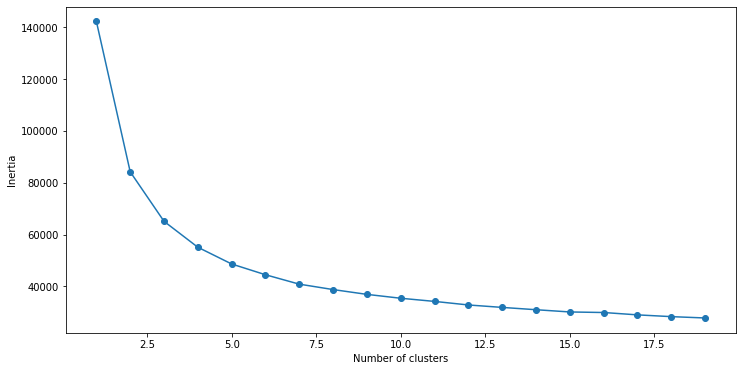

In [84]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled1)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [85]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled1)
pred = kmeans.predict(data_scaled1)

In [86]:
frame = pd.DataFrame(data_scaled1)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    2809
4    1410
0     407
2     156
3     122
Name: cluster, dtype: int64

In [88]:
frame_NF = frame[frame['cluster']==4].reset_index().rename(columns={'index':'Provider'})
Nframe_list = frame_NF.Provider.to_list()

In [95]:
all_features_F1

,index,Provider,CDC_2449,CDC_25000,CDC_2720,CDC_2724,CDC_4011,CDC_4019,CDC_41401,CDC_42731,CDC_4280,CDC_496,CDC_53081,CDC_5990,CDC_V5861,CDC_V5869,CPC_2724,CPC_3995,CPC_4019,CPC_66,Male_Patient,Female_Patient,Hos_Stay_Total,Payment_Total,Claim_Len_Total,Alzheimer,Heartfailure,KidneyDisease,ObstrPulmonary,Diabetes,IschemicHeart,Osteoporasis,stroke,County_Count,DiagnosisGroupCode,PotentialFraud
0,0,PRV55912,5,7,0.0,8,0.0,9,4.0,8,7,4.0,5.0,5.0,0.0,0.0,0,1,1,1,46.0,54.0,388.0,814190.0,469,48,61,58,46,81,94,34,23,42,56.0,1
1,1,PRV54986,8,9,0.0,9,0.0,9,9.0,9,7,10.0,9.0,8.0,0.0,0.0,2,1,2,1,243.0,299.0,908.0,1851946.0,1606,281,367,270,205,442,495,223,60,51,133.0,1
2,2,PRV51148,5,8,0.0,8,0.0,8,7.0,7,7,6.0,6.0,4.0,0.0,0.0,1,1,1,1,123.0,140.0,137.0,524954.0,610,111,195,135,94,227,253,108,31,34,33.0,1
3,3,PRV55215,10,9,0.0,10,0.0,10,10.0,10,10,10.0,10.0,10.0,0.0,0.0,2,1,2,1,1108.0,1530.0,792.0,2443886.0,5671,1341,1983,1346,961,2389,2533,1103,297,239,124.0,1
4,4,PRV55193,3,6,0.0,5,0.0,5,6.0,4,7,2.0,6.0,4.0,0.0,0.0,0,0,1,1,21.0,17.0,210.0,477488.0,230,23,30,24,20,39,38,12,5,12,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,PRV57282,0,2,0.0,2,0.0,4,0.0,1,0,2.0,1.0,0.0,0.0,0.0,0,0,0,0,15.0,10.0,0.0,8350.0,22,10,31,26,18,27,29,5,1,2,0.0,1
502,502,PRV54540,1,1,0.0,0,0.0,3,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,6.0,13.0,0.0,9790.0,0,6,12,6,5,11,13,8,1,5,0.0,1
503,503,PRV56523,1,0,0.0,1,0.0,3,1.0,0,2,1.0,0.0,1.0,0.0,0.0,0,0,0,0,10.0,10.0,0.0,6670.0,20,7,11,8,9,14,15,6,3,2,0.0,1
504,504,PRV55895,0,0,0.0,1,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,200.0,1,1,1,1,0,1,1,0,0,1,0.0,1


In [106]:
all_features

,CDC_2449,CDC_25000,CDC_2720,CDC_2724,CDC_4011,CDC_4019,CDC_41401,CDC_42731,CDC_4280,CDC_496,CDC_53081,CDC_5990,CDC_V5861,CDC_V5869,CPC_2724,CPC_3995,CPC_4019,CPC_66,Male_Patient,Female_Patient,Hos_Stay_Total,Payment_Total,Claim_Len_Total,Alzheimer,Heartfailure,KidneyDisease,ObstrPulmonary,Diabetes,IschemicHeart,Osteoporasis,stroke,County_Count,DiagnosisGroupCode,PotentialFraud
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV55912,5,7,0.0,8,0.0,9,4.0,8,7,4.0,5.0,5.0,0.0,0.0,0,1,1,1,46.0,54.0,388.0,814190.0,469,48,61,58,46,81,94,34,23,42,56.0,Yes
PRV54986,8,9,0.0,9,0.0,9,9.0,9,7,10.0,9.0,8.0,0.0,0.0,2,1,2,1,243.0,299.0,908.0,1851946.0,1606,281,367,270,205,442,495,223,60,51,133.0,Yes
PRV51148,5,8,0.0,8,0.0,8,7.0,7,7,6.0,6.0,4.0,0.0,0.0,1,1,1,1,123.0,140.0,137.0,524954.0,610,111,195,135,94,227,253,108,31,34,33.0,Yes
PRV55215,10,9,0.0,10,0.0,10,10.0,10,10,10.0,10.0,10.0,0.0,0.0,2,1,2,1,1108.0,1530.0,792.0,2443886.0,5671,1341,1983,1346,961,2389,2533,1103,297,239,124.0,Yes
PRV55193,3,6,0.0,5,0.0,5,6.0,4,7,2.0,6.0,4.0,0.0,0.0,0,0,1,1,21.0,17.0,210.0,477488.0,230,23,30,24,20,39,38,12,5,12,31.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV54302,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0,0.0,0.0,3300.0,0,1,0,1,0,1,1,0,0,1,0.0,No
PRV57762,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0,0.0,0.0,1900.0,0,0,0,1,1,1,1,0,0,1,0.0,No
PRV51577,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,2100.0,20,1,1,1,1,1,1,0,0,1,0.0,No


In [97]:
all_features_NF1 = all_features_NF.reset_index()

In [98]:
all_features_NF1 = all_features_NF1.reset_index()

In [99]:
NFraud_Cluster_4 = all_features_NF1[all_features_NF1['index'].isin(Nframe_list)]
NFraud_Cluster_4

,index,Provider,CDC_2449,CDC_25000,CDC_2720,CDC_2724,CDC_4011,CDC_4019,CDC_41401,CDC_42731,CDC_4280,CDC_496,CDC_53081,CDC_5990,CDC_V5861,CDC_V5869,CPC_2724,CPC_3995,CPC_4019,CPC_66,Male_Patient,Female_Patient,Hos_Stay_Total,Payment_Total,Claim_Len_Total,Alzheimer,Heartfailure,KidneyDisease,ObstrPulmonary,Diabetes,IschemicHeart,Osteoporasis,stroke,County_Count,DiagnosisGroupCode,PotentialFraud
1,1,PRV56046,3,1,0.0,3,0.0,4,0.0,5,2,0.0,0.0,0.0,1.0,0.0,0,0,1,0,8.0,9.0,72.0,136632.0,72,16,14,12,9,16,18,10,3,5,14.0,0
3,3,PRV56614,2,4,1.0,2,0.0,5,0.0,3,2,0.0,0.0,0.0,1.0,0.0,0,1,1,0,12.0,13.0,102.0,139984.0,116,10,20,15,18,21,24,8,2,7,15.0,0
7,7,PRV56118,1,3,0.0,6,0.0,2,0.0,3,2,0.0,0.0,0.0,1.0,0.0,1,1,0,1,7.0,7.0,105.0,129884.0,105,6,8,6,6,9,12,4,3,1,13.0,0
10,10,PRV51710,1,2,0.0,4,0.0,4,0.0,0,3,0.0,0.0,0.0,0.0,2.0,1,1,2,1,6.0,11.0,57.0,136112.0,57,8,14,10,8,14,16,11,4,4,13.0,0
14,14,PRV51550,3,6,0.0,4,1.0,3,0.0,2,3,0.0,0.0,0.0,3.0,1.0,0,0,0,1,23.0,30.0,128.0,140160.0,188,31,46,28,15,45,49,19,8,9,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,PRV54526,3,4,1.0,3,1.0,3,0.0,3,1,0.0,0.0,0.0,3.0,3.0,0,0,0,0,10.0,7.0,0.0,10310.0,7,13,11,11,7,30,31,7,0,6,0.0,0
4332,4332,PRV57443,1,3,1.0,3,5.0,4,0.0,2,1,0.0,0.0,0.0,2.0,2.0,0,0,0,0,12.0,10.0,0.0,33910.0,52,17,26,28,17,40,40,14,6,6,0.0,0
4381,4381,PRV52796,1,1,1.0,2,2.0,4,0.0,1,1,0.0,0.0,0.0,3.0,1.0,0,0,0,0,7.0,9.0,0.0,16830.0,34,16,20,25,12,27,37,14,0,3,0.0,0
4447,4447,PRV57381,0,2,3.0,2,2.0,5,0.0,1,1,0.0,0.0,0.0,1.0,1.0,0,0,0,0,6.0,6.0,0.0,18740.0,151,1,30,19,23,40,48,16,1,2,0.0,0


In [102]:
NFraud_Cluster_4['CDC_41401'].value_counts()

0.0    1410
Name: CDC_41401, dtype: int64

In [103]:
NFraud_Cluster_4['CDC_53081'].value_counts()

0.0    1410
Name: CDC_53081, dtype: int64

In [104]:
NFraud_Cluster_4['CDC_496'].value_counts()

0.0    1410
Name: CDC_496, dtype: int64

In [105]:
NFraud_Cluster_4['CDC_5990'].value_counts()

0.0    1410
Name: CDC_5990, dtype: int64

In [110]:
Fraud_Codes = [ 'CDC_2724', 'CDC_41401', 'CDC_496', 'CDC_53081',
       'CDC_5990']


In [128]:
Found_Fraud = all_features[[ 'CDC_2724', 'CDC_41401', 'CDC_496', 'CDC_53081',
       'CDC_5990', 'PotentialFraud']]

In [133]:
Found_Fraud1 = all_features_all[['Female_Patient', 'Age(26-40)', 'Age(81-100)', 'Race_Native',
       'State_Count', 'CDC_2724', 'CDC_41401', 'CDC_496', 'CDC_53081',
       'CDC_5990', 'DGC_192', 'DGC_202','PotentialFraud','Provider']].set_index('Provider')
